# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN_IMP import GAN
from utils.loaders import load_fashion_mnist

Using TensorFlow backend.


In [2]:
RUN_ID = '0007'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_fashion_mnist(28,28)

## architecture

In [4]:
x_train.shape

(60000, 28, 28, 1)

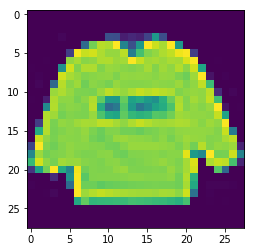

In [5]:
plt.imshow(x_train[0,:,:,0])

In [6]:
INPUT_DIM = (28,28,1)

CONV_FILTERS = [64,64,128, 256]
CONV_KERNEL_SIZES = [4,4,4,4]
CONV_STRIDES = [2,2,2,1]
CONV_PADDINGS = ['same', 'same', 'same', 'same']

CONV_T_FILTERS = [128,64,1]
CONV_T_KERNEL_SIZES = [4,4,4]
CONV_T_STRIDES = [1,2,2]
CONV_T_PADDINGS = ['same','same','same']

Z_DIM = 100


In [7]:
gan = GAN(INPUT_DIM
                , CONV_FILTERS
                , CONV_KERNEL_SIZES
                , CONV_STRIDES
                , CONV_PADDINGS
                , CONV_T_FILTERS
                , CONV_T_KERNEL_SIZES
                , CONV_T_STRIDES
                , CONV_T_PADDINGS
                , Z_DIM
                 )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          65536     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 64)          0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
activation_1 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 7, 7, 128)         262144    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
__________

## training

In [11]:
BATCH_SIZE = 32
EPOCHS = 40000
PRINT_EVERY_N_BATCHES = 10
INITIAL_EPOCH = 0

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: -0.000176] [G loss: 0.000319]
1 [D loss: -0.000175] [G loss: 0.000319]
2 [D loss: -0.000177] [G loss: 0.000317]
3 [D loss: -0.000178] [G loss: 0.000315]
4 [D loss: -0.000179] [G loss: 0.000314]
5 [D loss: -0.000179] [G loss: 0.000314]
6 [D loss: -0.000179] [G loss: 0.000314]
7 [D loss: -0.000179] [G loss: 0.000316]
8 [D loss: -0.000179] [G loss: 0.000317]
9 [D loss: -0.000180] [G loss: 0.000319]
10 [D loss: -0.000180] [G loss: 0.000322]
11 [D loss: -0.000180] [G loss: 0.000327]
12 [D loss: -0.000180] [G loss: 0.000334]
13 [D loss: -0.000181] [G loss: 0.000344]
14 [D loss: -0.000180] [G loss: 0.000355]
15 [D loss: -0.000181] [G loss: 0.000369]
16 [D loss: -0.000182] [G loss: 0.000381]
17 [D loss: -0.000183] [G loss: 0.000392]
18 [D loss: -0.000186] [G loss: 0.000402]
19 [D loss: -0.000190] [G loss: 0.000412]
20 [D loss: -0.000194] [G loss: 0.000420]
21 [D loss: -0.000199] [G loss: 0.000428]
22 [D loss: -0.000204] [G loss: 0.000435]
23 [D loss: -0.000210] [G loss: 0.000441]
24

194 [D loss: -0.000599] [G loss: -0.003894]
195 [D loss: 0.001119] [G loss: -0.002901]
196 [D loss: -0.000211] [G loss: -0.000118]
197 [D loss: -0.000216] [G loss: -0.001035]
198 [D loss: 0.004127] [G loss: 0.000069]
199 [D loss: 0.002472] [G loss: 0.000171]
200 [D loss: 0.001437] [G loss: -0.000967]
201 [D loss: 0.001114] [G loss: 0.001608]
202 [D loss: 0.000920] [G loss: 0.001252]
203 [D loss: 0.000206] [G loss: 0.003629]
204 [D loss: 0.003060] [G loss: 0.002655]
205 [D loss: 0.002905] [G loss: 0.004553]
206 [D loss: 0.002684] [G loss: 0.006228]
207 [D loss: 0.000715] [G loss: 0.004804]
208 [D loss: 0.000758] [G loss: 0.006826]
209 [D loss: 0.001615] [G loss: 0.003890]
210 [D loss: 0.001643] [G loss: 0.005552]
211 [D loss: -0.000391] [G loss: 0.004838]
212 [D loss: 0.002576] [G loss: 0.006570]
213 [D loss: 0.002466] [G loss: 0.006075]
214 [D loss: 0.001318] [G loss: 0.005534]
215 [D loss: 0.004309] [G loss: 0.002437]
216 [D loss: 0.001114] [G loss: 0.003097]
217 [D loss: 0.004501] [G

387 [D loss: -0.001668] [G loss: 0.000711]
388 [D loss: -0.001579] [G loss: 0.000605]
389 [D loss: -0.000685] [G loss: 0.001331]
390 [D loss: -0.000448] [G loss: 0.000569]
391 [D loss: -0.000407] [G loss: 0.000356]
392 [D loss: -0.001073] [G loss: 0.001019]
393 [D loss: 0.000060] [G loss: 0.000679]
394 [D loss: -0.000173] [G loss: 0.000246]
395 [D loss: -0.000601] [G loss: -0.000124]
396 [D loss: -0.000346] [G loss: 0.000376]
397 [D loss: -0.001117] [G loss: 0.000228]
398 [D loss: -0.000388] [G loss: 0.000899]
399 [D loss: -0.001266] [G loss: 0.001702]
400 [D loss: -0.000720] [G loss: 0.001990]
401 [D loss: -0.000709] [G loss: 0.000427]
402 [D loss: 0.000136] [G loss: 0.001432]
403 [D loss: -0.000322] [G loss: 0.000519]
404 [D loss: -0.001943] [G loss: 0.000385]
405 [D loss: -0.001820] [G loss: 0.000548]
406 [D loss: -0.001222] [G loss: 0.000762]
407 [D loss: -0.000962] [G loss: 0.000318]
408 [D loss: -0.000701] [G loss: 0.000685]
409 [D loss: -0.001095] [G loss: -0.000516]
410 [D loss

578 [D loss: -0.001015] [G loss: 0.002612]
579 [D loss: -0.001012] [G loss: 0.002681]
580 [D loss: -0.000945] [G loss: 0.002665]
581 [D loss: -0.000994] [G loss: 0.002564]
582 [D loss: -0.001005] [G loss: 0.002901]
583 [D loss: -0.000970] [G loss: 0.002984]
584 [D loss: -0.001155] [G loss: 0.003007]
585 [D loss: -0.000993] [G loss: 0.002978]
586 [D loss: -0.000884] [G loss: 0.003024]
587 [D loss: -0.000887] [G loss: 0.002776]
588 [D loss: -0.000893] [G loss: 0.003001]
589 [D loss: -0.001178] [G loss: 0.002752]
590 [D loss: -0.000934] [G loss: 0.002701]
591 [D loss: -0.001087] [G loss: 0.002535]
592 [D loss: -0.001090] [G loss: 0.002423]
593 [D loss: -0.001112] [G loss: 0.002443]
594 [D loss: -0.001264] [G loss: 0.002362]
595 [D loss: -0.001051] [G loss: 0.002330]
596 [D loss: -0.000852] [G loss: 0.002218]
597 [D loss: -0.001034] [G loss: 0.002423]
598 [D loss: -0.000899] [G loss: 0.002276]
599 [D loss: -0.001114] [G loss: 0.002203]
600 [D loss: -0.001013] [G loss: 0.002406]
601 [D loss

769 [D loss: -0.001003] [G loss: 0.001252]
770 [D loss: -0.001026] [G loss: 0.001305]
771 [D loss: -0.001023] [G loss: 0.001209]
772 [D loss: -0.001015] [G loss: 0.001203]
773 [D loss: -0.000980] [G loss: 0.001159]
774 [D loss: -0.000989] [G loss: 0.001226]
775 [D loss: -0.000999] [G loss: 0.001130]
776 [D loss: -0.001002] [G loss: 0.001151]
777 [D loss: -0.001051] [G loss: 0.001256]
778 [D loss: -0.001086] [G loss: 0.001204]
779 [D loss: -0.001035] [G loss: 0.001192]
780 [D loss: -0.001045] [G loss: 0.001256]
781 [D loss: -0.000980] [G loss: 0.001276]
782 [D loss: -0.001049] [G loss: 0.001183]
783 [D loss: -0.001097] [G loss: 0.001202]
784 [D loss: -0.001047] [G loss: 0.001184]
785 [D loss: -0.001008] [G loss: 0.001088]
786 [D loss: -0.001047] [G loss: 0.001088]
787 [D loss: -0.001012] [G loss: 0.000944]
788 [D loss: -0.000944] [G loss: 0.000948]
789 [D loss: -0.001032] [G loss: 0.000961]
790 [D loss: -0.001031] [G loss: 0.001028]
791 [D loss: -0.001043] [G loss: 0.000974]
792 [D loss

959 [D loss: -0.000990] [G loss: -0.000309]
960 [D loss: -0.001009] [G loss: -0.000440]
961 [D loss: -0.001002] [G loss: -0.000401]
962 [D loss: -0.000908] [G loss: -0.000380]
963 [D loss: -0.001066] [G loss: -0.000316]
964 [D loss: -0.001053] [G loss: -0.000359]
965 [D loss: -0.000968] [G loss: -0.000465]
966 [D loss: -0.001006] [G loss: -0.000513]
967 [D loss: -0.001002] [G loss: -0.000550]
968 [D loss: -0.001056] [G loss: -0.000478]
969 [D loss: -0.001017] [G loss: -0.000607]
970 [D loss: -0.001036] [G loss: -0.000556]
971 [D loss: -0.001002] [G loss: -0.000574]
972 [D loss: -0.001077] [G loss: -0.000554]
973 [D loss: -0.000999] [G loss: -0.000523]
974 [D loss: -0.000964] [G loss: -0.000499]
975 [D loss: -0.000988] [G loss: -0.000422]
976 [D loss: -0.001046] [G loss: -0.000458]
977 [D loss: -0.001040] [G loss: -0.000431]
978 [D loss: -0.000984] [G loss: -0.000397]
979 [D loss: -0.001001] [G loss: -0.000546]
980 [D loss: -0.001012] [G loss: -0.000693]
981 [D loss: -0.000992] [G loss:

KeyboardInterrupt: 

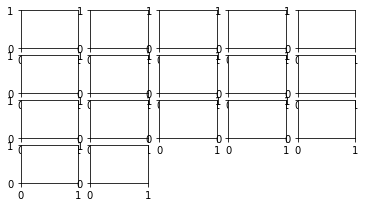

In [12]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 40000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    ,discriminator_training_loops = 5
)

In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights('./run/0006/weights/weights.h5')